# **Movie Recommender Systems - 2022 Honor Thesis**

*Yuanrui(Jerry) Zhu*

---



In this notebook we want to building a naive (but useful) Movie Recommendation System using [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). 

There are a basedline and three types of recommender systems we want to build:


> *  **Demographic Filtering (Baseline)** - provide generalized recommendations to every user, based on movie overall popularity and/or genre. Since each user is different, this approach is considered to be too simple (could be a homepage recommendation for a movie watching website if it has no information about the user, not only the watch history but also the ratings of movies). The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. It makes sense for developing such system as a baseline recommendation.



> *  **Content Based Filtering** - suggest similar items based on a particular movie instance. This technique uses the movie metadata, such as genre, director, description, actors, etc. for movie recommendation. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it, measured by Cosine-Similarity. There are two recommender systems, **Plot Description Based** and **Credits, Genres and Keywords Based**, they each have their strength and weakness on some perspectives.

> *  **Collaborative Filtering (SVD)** - matches persons with similar interests and provides recommendations based on this matching among them and rating history. Collaborative filters does not use metadata like its content-based counterparts, but is able to provide a more personal suggestions.

Connect to Google Drive and load the data (please note that this notebook is written in Google Colab, there might be a few changes in cells if it is implemented in JupyterNotebook)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np 
df1 = pd.read_csv('/content/drive/MyDrive/archive 2/tmdb_5000_credits.csv')
df2 = pd.read_csv('/content/drive/MyDrive/archive 2/tmdb_5000_movies.csv')

In [ ]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Rename the first dataset and merge on the second dataset using the "id" column

df1.rename(columns = {"movie_id": "id"}, inplace = True)
df2 = df2.merge(df1, on ='id')

In [ ]:
# See the Data Type and missing values of the columns

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# **Demographic Filtering** -
   

In [ ]:
C= df2['vote_average'].mean()
m= df2['vote_count'].quantile(0.9)
q_movies = df2.copy().loc[df2['vote_count'] >= m]

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('vote_average', ascending=False)

#Print the top 15 movies
q_movies[['original_title', 'vote_count', 'vote_average']].head(10)

,original_title,vote_count,vote_average
7,The Shawshank Redemption,8205,8.5
9,The Godfather,5893,8.4
10,千と千尋の神隠し,3840,8.3
11,Whiplash,4254,8.3
12,The Godfather: Part II,3338,8.3
13,Pulp Fiction,8428,8.3
14,Fight Club,9413,8.3
16,Schindler's List,4329,8.3
26,Forrest Gump,7927,8.2
31,もののけ姫,1983,8.2


<Axes: title={'center': 'vote_count'}, xlabel='year'>

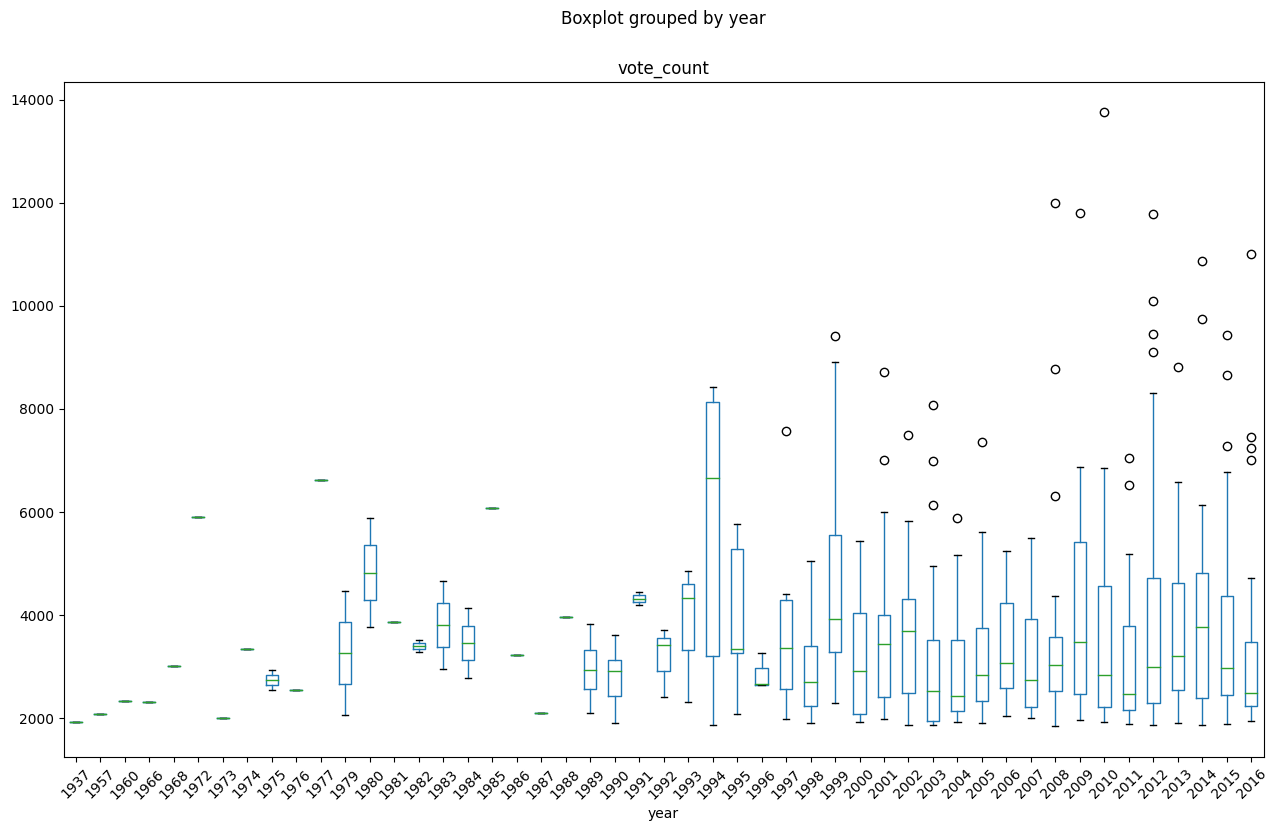

In [ ]:
import matplotlib.pyplot as plt

q_movies['year'] = pd.DatetimeIndex(q_movies['release_date']).year
fig, ax = plt.subplots(figsize=(15,9))

q_movies.boxplot(column = 'vote_count', by = 'year', ax = ax, rot = 45, grid = False)

Text(0.5, 1.0, 'Popular Movies')

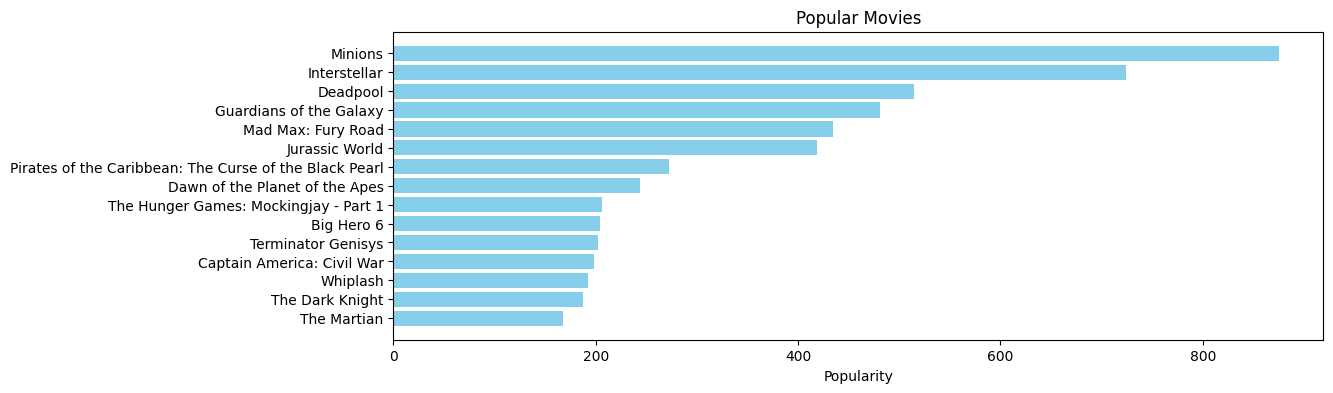

In [ ]:
pop = df2.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))
plt.barh(pop['original_title'].head(15), pop['popularity'].head(15), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


# **Content Based Filtering**


In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [ ]:
pd.DataFrame(tfidf_matrix.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,...,20968,20969,20970,20971,20972,20973,20974,20975,20976,20977
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['original_title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim = cosine_sim, num = 10):
    '''
    Function that takes in movie title as input and outputs most similar movies
    '''
    
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1: num + 1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['original_title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

1905         My Soul to Take
3506               Don McKay
808             Walking Tall
2852             Young Adult
1816          The Best of Me
954                The Judge
1801    Welcome to Mooseport
2293             The Crazies
2010                Forsaken
3521          Sunshine State
Name: original_title, dtype: object

In [ ]:
get_recommendations('Interstellar')

1990                         The Empire Strikes Back
2912                                       Star Wars
229     Star Wars: Episode III - Revenge of the Sith
233        Star Wars: Episode I - The Phantom Menace
3652                                          Decoys
2863                                            十面埋伏
2784                                          인천상륙작전
3289                         The Wendell Baker Story
71             The Mummy: Tomb of the Dragon Emperor
4603                                    My Dog Tulip
Name: original_title, dtype: object

In [ ]:
get_recommendations('The Godfather')

2638                  Metropolis
738                          Joy
650               Eyes Wide Shut
1416                 Jersey Girl
1026    Riding in Cars with Boys
1179             I Love You, Man
4732               Straightheads
2536             The Deer Hunter
2855             Living Out Loud
2321            The Family Stone
Name: original_title, dtype: object

In [ ]:
get_recommendations('The Avengers')

3285                             Restless
2942                        Woman in Gold
4411                                Proud
2377                      The Railway Man
571                  Inglourious Basterds
3750                     The Great Escape
2052                            Zwartboek
680                                 U-571
117     Charlie and the Chocolate Factory
1468                         The Fountain
Name: original_title, dtype: object

## **Credits, Genres and Keywords Based Recommender**


In [ ]:
# take a look at the dataframe once again
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],...,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,Stiff Upper Lips,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,Me You and Five Bucks,[],[]
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"Dancer, Texas Pop. 81","[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,Little Big Top,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]
3992,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],...,0.0,[],Released,NaN,Sardaarji,9.5,2,Sardaarji,[],"[{""credit_id"": ""558ab3f4925141076f0001d7"", ""de..."


In [ ]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres', 'production_companies']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        # Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres', 'production_companies']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [ ]:
# Print the new features of the first 3 films
df2[['original_title', 'cast', 'director', 'keywords', 'genres', 'production_companies']].head(3)

,original_title,cast,director,keywords,genres,production_companies
3519,Stiff Upper Lips,"[Georgina Cates, Peter Ustinov, Prunella Scales]",Gary Sinyor,"[italy, victorian england, young woman]",[Comedy],[]
4247,Me You and Five Bucks,[],NaN,[],"[Romance, Comedy, Drama]",[]
4045,"Dancer, Texas Pop. 81","[Breckin Meyer, Peter Facinelli, Eddie Mills]",Tim McCanlies,"[small town, texas]","[Comedy, Drama, Family]","[HSX Films, Chase Productions]"


In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres', 'production_companies']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [ ]:
def create_soup(x):

    # since director would play a more vital role in the movie than any other features
    # we want to increase its weight, done by adding it twice

    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + x['director']
    + ' '.join(x['genres'])+ ' ' + ' '.join(x['production_companies'])

df2['soup'] = df2.apply(create_soup, axis=1)

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

4774                           Fabled
158             Dream with the Fishes
1233               Boynton Beach Club
4686                  The Real Cancun
135             Raising Victor Vargas
1216                    Fetching Cody
1267              You Can Count on Me
1366                             Slam
1404    L.I.E. Long Island Expressway
1940                          Get Low
Name: original_title, dtype: object

In [ ]:
get_recommendations('The Godfather', cosine_sim2)

3789                    Hit & Run
4028           They Came Together
2522          Muppets Most Wanted
3930                    Admission
4019             Without a Paddle
68                     Inside Out
1419                     Megamind
1921    This Is Where I Leave You
2196                    Idiocracy
2627                    Dragonfly
Name: original_title, dtype: object

# **Collaborative Filtering**



### **Single Value Decomposition**


Since the dataset we used before did not have userId (which is necessary for collaborative filtering) let's load another dataset -- [**The Movies Dataset**](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv). We'll be using the [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) library to implement SVD.

In [ ]:
!pip install surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.model_selection import train_test_split

ratings = pd.read_csv('/content/drive/MyDrive/archive 2/ratings_small.csv')
movies_meta = pd.read_csv('/content/drive/MyDrive/archive 2/movies_metadata.csv')
ratings_test = ratings.sample(frac = 0.2, random_state=42)
reader = Reader()
ratings.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193685 sha256=008f2d59697ad4a84033efa0702971f6ef3359b1b0d18c0871d5dae5fbfcc0b6
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


<ipython-input-34-51c830429501>:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_meta = pd.read_csv('/content/drive/MyDrive/archive 2/movies_metadata.csv')


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


The median of the number of votes is 71.0


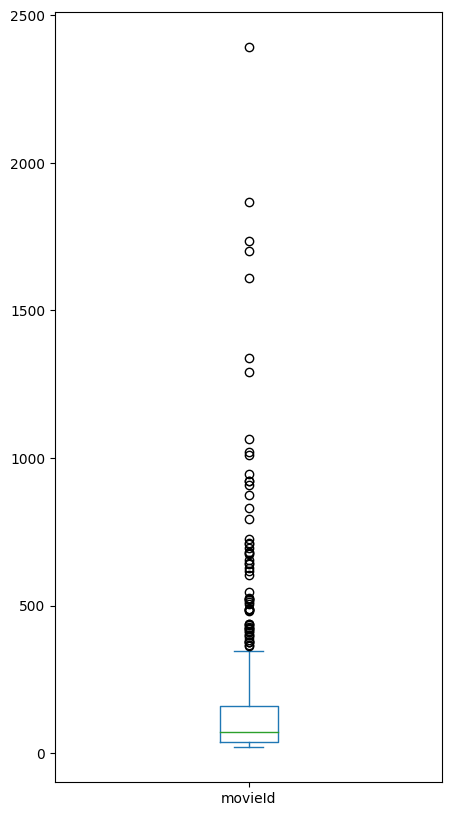

In [ ]:
# find the distribution of number of votes among users
import matplotlib.pyplot as plt

plt.figure(figsize=(5,10))
rate_num = ratings.groupby(["userId"])["movieId"].count()
rate_num.plot.box()
print("The median of the number of votes is", rate_num.median())

In [ ]:
from surprise.model_selection import KFold
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits=5)
kf.split(data)

<generator object KFold.split at 0x7fa10528b120>

In [ ]:
svd = SVD(n_factors = 200, n_epochs = 30)
cross_validate(svd, data, measures = ['MSE', 'MAE'])

{'test_mse': array([0.81335096, 0.79943049, 0.80674917, 0.81772144, 0.83220506]),
 'test_mae': array([0.69153213, 0.69010458, 0.69193397, 0.69772941, 0.70396685]),
 'fit_time': (3.3393781185150146,
  3.0791845321655273,
  3.557403326034546,
  3.576796054840088,
  3.093879461288452),
 'test_time': (0.15337228775024414,
  0.19356584548950195,
  0.2516157627105713,
  0.1448817253112793,
  0.1480095386505127)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
# a simple preprocessing of the dataset since we have weird "-" on movie id column
# we are expecting all the ids to be strings which can convert to int

movies_meta = movies_meta[~movies_meta["id"].str.contains("-")]

In [ ]:
def get_user_recommendation(uid, num_movie = 10):
  '''
  Get the movie recommendation for a specific user 
  '''
  # all the movies
  id_range = [int(i) for i in movies_meta['id']]

  # create a series with index of id_range and value being the predicted SVD score
  film_id = pd.Series(data = [svd.predict(uid, i, 4)[3] for i in id_range], index = id_range) 

  # get the top movie id
  movie_indices = film_id.sort_values(ascending = False).index[:num_movie] 
  movie_indices = [str(i) for i in movie_indices]
  
  # refer to the movie_metadata, get the name of the movie
  return movies_meta[movies_meta['id'].isin(movie_indices)]['original_title']

In [ ]:
def get_rated_movie(uid):
   '''
   return the name of the movies that a specific user rated, from score high to low
   '''
   id_lst = ratings[ratings['userId'] == uid].sort_values("rating", ascending = False)['movieId']
   id_lst = [str(i) for i in id_lst]
   return movies_meta[movies_meta['id'].isin(id_lst)]['original_title']

In [ ]:
get_user_recommendation(1)

286                      Once Were Warriors
302                  Trois couleurs : Rouge
938                            The 39 Steps
3382                                Солярис
4020               The Million Dollar Hotel
5295                            5 Card Stud
6388     Terminator 3: Rise of the Machines
11355                  Flags of Our Fathers
14332                                Аэлита
43836                        Totally Blonde
Name: original_title, dtype: object

In [ ]:
get_rated_movie(1)

2297                          Rocky III
2591                       American Pie
3213                           My Tutor
4604     Jay and Silent Bob Strike Back
8310                              Greed
10719                Vivement dimanche!
Name: original_title, dtype: object

In [ ]:
get_user_recommendation(173)

278                                     Nell
474                           Judgment Night
534                     Sleepless in Seattle
2648                 The Thomas Crown Affair
4020                The Million Dollar Hotel
4135                                Scarface
4843     Le fabuleux destin d'Amélie Poulain
6836                         Broken Blossoms
7056          Les Vacances de Monsieur Hulot
11566                          Lonely Hearts
Name: original_title, dtype: object

In [ ]:
get_rated_movie(173)

474                                Judgment Night
889                                 Roman Holiday
897                         2001: A Space Odyssey
938                                  The 39 Steps
1100              Monty Python and the Holy Grail
1215                                            M
1300        Nosferatu, eine Symphonie des Grauens
2051                              Rosemary's Baby
2067                                         Rope
2296                                     Rocky II
2389                                 Office Space
2429          Lock, Stock and Two Smoking Barrels
2592                               Arlington Road
2647                              The Sixth Sense
3405                                   Parenthood
3659                              Shaft in Africa
3822                                   Get Carter
3880                         The Living Daylights
3886                                       Snatch
4921                      Italiensk for begyndere


## **Conclusion** 

We create recommenders using demographic , content- based and collaborative filtering. We can see a promotion in performance as we try more advanced models (more work should be done to actually quantify the difference in performance, such as experiments or interviews). However, this recommender system is still very naive and have a potential to be improved given larger, more up-to-date dataset on both movies and users. There also exists numerous more advanced methods that can be used in making the recommendation.


In [ ]:
plt.figure(figsize=(12, 9))
q_movies.groupby(['year'])['budget'].count().plot.bar(rot = 45)

We can see the peak of number of movies is on year 2012, only above 80. If I were to carry on an experiment to test the real accuracy of the system, I may have the movie in the data that my interviewees have seen, which put an obstacle on varifying the capacity of collaborative model.

Some alternative choices of dataset I would look into:


*   UpdatedTMDB Movies Dataset: https://www.kaggle.com/datasets/jillanisofttech/updatedtmdb-movies-dataset
*   Movie Dataset Rating (Latest Most Rated Movie Dataset): https://www.kaggle.com/datasets/ayushjain001/movie-dataset-rating




### Reference ###

*   This is the blog I learn about the SVD algorithm: https://towardsdatascience.com/intro-to-recommender-system-collaborative-filtering-64a238194a26
*   This is where I learn about TF-IDF: https://people.ischool.berkeley.edu/~dbamman/nlp20_slides/8_vector_semantics.pdf



